## PaddlePaddle OCR 

In [1]:
#pip install paddlepaddle
#pip install paddleocr

In [2]:
import PIL
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from paddleocr import PaddleOCR,draw_ocr
# Paddleocr supports Chinese, English, French, German, Korean and Japanese.
# You can set the parameter `lang` as `ch`, `en`, `fr`, `german`, `korean`, `japan`
# to switch the language model in order.

/home/dae/Documents/PaddlePaddle-OCR/env/lib/python3.8/site-packages/skimage/morphology/_skeletonize.py:241: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  0, 1, 1, 0, 0, 1, 0, 0, 0], dtype=np.bool)
/home/dae/Documents/PaddlePaddle-OCR/env/lib/python3.8/site-packages/skimage/morphology/_skeletonize.py:256: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [16]:
def create_ocr_image(img_path, lang='en'):
    ocr = PaddleOCR(use_angle_cls=True, lang=lang) #downloads and loads model into memory
    result = ocr.ocr(img_path, cls=True)
    image = Image.open(img_path).convert('RGB')

    boxes = [line[0] for line in result]
    txts = [line[1][0] for line in result]
    scores = [line[1][1] for line in result]

    outimg = np.ones_like(np.array(image)) * 255
    outimg_pil = Image.fromarray(outimg)
    draw = PIL.ImageDraw.Draw(outimg_pil)

    for bbox, txt in zip(boxes, txts):
        draw.polygon([(bbox[0][0], bbox[0][1]), (bbox[1][0], bbox[1][1]), (bbox[2][0], bbox[2][1]), (bbox[3][0], bbox[3][1])], "white", "black")
        box_ht = int(bbox[3][1] - bbox[0][1])
        fontText = PIL.ImageFont.truetype("./font/simfang.ttf", box_ht, encoding="utf-8")
        draw.text((bbox[0][0], bbox[0][1]), txt, (0,0,0), font=fontText)

    plt.figure(figsize=(20, 12))
    plt.subplot(121)
    plt.axis('off')
    plt.imshow(image)
    plt.subplot(122)
    plt.imshow(outimg_pil)
    plt.axis('off')

[2021/10/14 11:04:55] root WARNING: lang en is not support in PP-OCRv2, use PP-OCR instead
[2021/10/14 11:04:55] root WARNING: lang en is not support in PP-OCRv2, use PP-OCR instead
[2021/10/14 11:04:55] root WARNING: version PP-OCRv2 not support cls models, use version PP-OCR instead
Namespace(benchmark=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/home/dae/.paddleocr/2.3.0.1/ocr/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/home/dae/.paddleocr/2.3.0.1/ocr/det/en/en_ppocr_mobile_v2.0_det_infer', det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768

E1014 11:04:55.122213  7978 analysis_config.cc:81] Please compile with gpu to EnableGpu()
--- Running analysis [ir_graph_build_pass]
--- Running analysis [ir_graph_clean_pass]
--- Running analysis [ir_analysis_pass]
--- Running IR pass [simplify_with_basic_ops_pass]
--- Running IR pass [layer_norm_fuse_pass]
---    Fused 0 subgraphs into layer_norm op.
--- Running IR pass [attention_lstm_fuse_pass]
--- Running IR pass [seqconv_eltadd_relu_fuse_pass]
--- Running IR pass [seqpool_cvm_concat_fuse_pass]
--- Running IR pass [mul_lstm_fuse_pass]
--- Running IR pass [fc_gru_fuse_pass]
--- Running IR pass [mul_gru_fuse_pass]
--- Running IR pass [seq_concat_fc_fuse_pass]
--- Running IR pass [squeeze2_matmul_fuse_pass]
--- Running IR pass [reshape2_matmul_fuse_pass]
--- Running IR pass [flatten2_matmul_fuse_pass]
--- Running IR pass [map_matmul_to_mul_pass]
--- Running IR pass [fc_fuse_pass]
--- Running IR pass [repeated_fc_relu_fuse_pass]
--- Running IR pass [squared_mat_sub_fuse_pass]
--- Runn

[2021/10/14 11:04:55] root DEBUG: dt_boxes num : 44, elapse : 0.15743064880371094


E1014 11:04:55.371186  7978 analysis_config.cc:81] Please compile with gpu to EnableGpu()
--- Running analysis [ir_graph_build_pass]
--- Running analysis [ir_graph_clean_pass]
--- Running analysis [ir_analysis_pass]
--- Running IR pass [simplify_with_basic_ops_pass]
--- Running IR pass [layer_norm_fuse_pass]
---    Fused 0 subgraphs into layer_norm op.
--- Running IR pass [attention_lstm_fuse_pass]
--- Running IR pass [seqconv_eltadd_relu_fuse_pass]
--- Running IR pass [seqpool_cvm_concat_fuse_pass]
--- Running IR pass [mul_lstm_fuse_pass]
--- Running IR pass [fc_gru_fuse_pass]
--- Running IR pass [mul_gru_fuse_pass]
--- Running IR pass [seq_concat_fc_fuse_pass]
--- Running IR pass [squeeze2_matmul_fuse_pass]
--- Running IR pass [reshape2_matmul_fuse_pass]
I1014 11:04:55.397253  7978 graph_pattern_detector.cc:91] ---  detected 1 subgraphs
--- Running IR pass [flatten2_matmul_fuse_pass]
--- Running IR pass [map_matmul_to_mul_pass]
I1014 11:04:55.398205  7978 graph_pattern_detector.cc:91

[2021/10/14 11:04:55] root DEBUG: cls num  : 44, elapse : 0.14852380752563477
[2021/10/14 11:04:56] root DEBUG: rec_res num  : 44, elapse : 0.7037885189056396


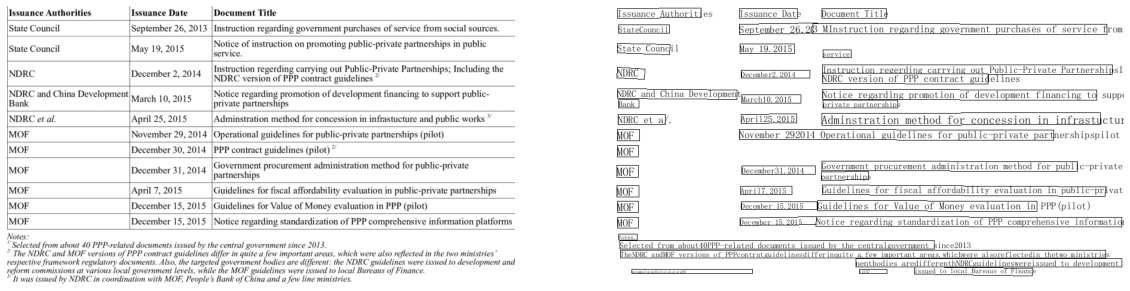

In [17]:
img_path = 'test-img/test-complex.png'
create_ocr_image(img_path)

[2021/10/14 10:43:21] root WARNING: lang en is not support in PP-OCRv2, use PP-OCR instead
[2021/10/14 10:43:21] root WARNING: lang en is not support in PP-OCRv2, use PP-OCR instead
[2021/10/14 10:43:21] root WARNING: version PP-OCRv2 not support cls models, use version PP-OCR instead
Namespace(benchmark=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/home/dae/.paddleocr/2.3.0.1/ocr/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/home/dae/.paddleocr/2.3.0.1/ocr/det/en/en_ppocr_mobile_v2.0_det_infer', det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768

E1014 10:43:21.550386  7978 analysis_config.cc:81] Please compile with gpu to EnableGpu()
--- Running analysis [ir_graph_build_pass]
--- Running analysis [ir_graph_clean_pass]
--- Running analysis [ir_analysis_pass]
--- Running IR pass [simplify_with_basic_ops_pass]
--- Running IR pass [layer_norm_fuse_pass]
---    Fused 0 subgraphs into layer_norm op.
--- Running IR pass [attention_lstm_fuse_pass]
--- Running IR pass [seqconv_eltadd_relu_fuse_pass]
--- Running IR pass [seqpool_cvm_concat_fuse_pass]
--- Running IR pass [mul_lstm_fuse_pass]
--- Running IR pass [fc_gru_fuse_pass]
--- Running IR pass [mul_gru_fuse_pass]
--- Running IR pass [seq_concat_fc_fuse_pass]
--- Running IR pass [squeeze2_matmul_fuse_pass]
--- Running IR pass [reshape2_matmul_fuse_pass]
--- Running IR pass [flatten2_matmul_fuse_pass]
--- Running IR pass [map_matmul_to_mul_pass]
--- Running IR pass [fc_fuse_pass]
--- Running IR pass [repeated_fc_relu_fuse_pass]
--- Running IR pass [squared_mat_sub_fuse_pass]
--- Runn

[2021/10/14 10:43:22] root DEBUG: dt_boxes num : 11, elapse : 0.20984745025634766
[2021/10/14 10:43:22] root DEBUG: cls num  : 11, elapse : 0.037641286849975586
[2021/10/14 10:43:22] root DEBUG: rec_res num  : 11, elapse : 0.20231175422668457


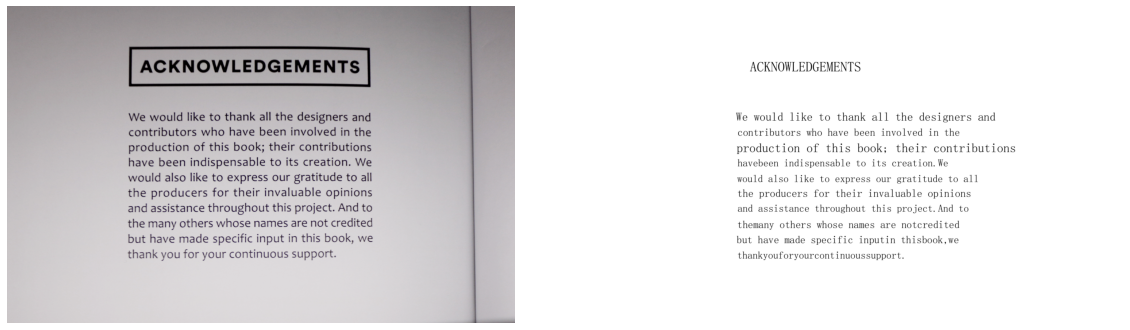

In [5]:
img_path = 'ppocr_img/ppocr_img/imgs_en/img_12.jpg'
create_ocr_image(img_path)

In [9]:
def create_ocr_html(img_path,out_html="output.html",lang="en"):
    ocr = PaddleOCR(use_angle_cls=True, lang=lang) #downloads and loads model into memory
    result = ocr.ocr(img_path, cls=True)
    image = Image.open(img_path).convert('RGB')
    boxes = [line[0] for line in result]
    txts = [line[1][0] for line in result]
    scores = [line[1][1] for line in result]
    str = ""
    for i in range(len(boxes)-1):
        if abs(boxes[i][0][1]-boxes[i+1][0][1]) > 70:
            str=str+" "+txts[i]+" <br><br>"
        elif abs(boxes[i][0][1]-boxes[i+1][0][1]) > 54:
            str=str+" "+txts[i]+"<br>"
        else:
            str=str+" "+txts[i]+" "
    str= str+txts[i+1]
    with open(out_html, "w") as e:
        e.write("<pre>" + str + "</pre> <br>\n")
    return str

In [18]:
ocr_en = PaddleOCR(use_angle_cls=True, lang="en")
ocr_ch = PaddleOCR(use_angle_cls=True, lang="ch")

[2021/10/14 11:08:14] root WARNING: lang en is not support in PP-OCRv2, use PP-OCR instead
[2021/10/14 11:08:14] root WARNING: lang en is not support in PP-OCRv2, use PP-OCR instead
[2021/10/14 11:08:14] root WARNING: version PP-OCRv2 not support cls models, use version PP-OCR instead
Namespace(benchmark=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/home/dae/.paddleocr/2.3.0.1/ocr/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/home/dae/.paddleocr/2.3.0.1/ocr/det/en/en_ppocr_mobile_v2.0_det_infer', det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768

E1014 11:08:14.090260  7978 analysis_config.cc:81] Please compile with gpu to EnableGpu()
--- Running analysis [ir_graph_build_pass]
--- Running analysis [ir_graph_clean_pass]
--- Running analysis [ir_analysis_pass]
--- Running IR pass [simplify_with_basic_ops_pass]
--- Running IR pass [layer_norm_fuse_pass]
---    Fused 0 subgraphs into layer_norm op.
--- Running IR pass [attention_lstm_fuse_pass]
--- Running IR pass [seqconv_eltadd_relu_fuse_pass]
--- Running IR pass [seqpool_cvm_concat_fuse_pass]
--- Running IR pass [mul_lstm_fuse_pass]
--- Running IR pass [fc_gru_fuse_pass]
--- Running IR pass [mul_gru_fuse_pass]
--- Running IR pass [seq_concat_fc_fuse_pass]
--- Running IR pass [squeeze2_matmul_fuse_pass]
--- Running IR pass [reshape2_matmul_fuse_pass]
--- Running IR pass [flatten2_matmul_fuse_pass]
--- Running IR pass [map_matmul_to_mul_pass]
--- Running IR pass [fc_fuse_pass]
--- Running IR pass [repeated_fc_relu_fuse_pass]
--- Running IR pass [squared_mat_sub_fuse_pass]
--- Runn

[2021/10/14 11:08:14] root WARNING: version PP-OCRv2 not support cls models, use version PP-OCR instead


E1014 11:08:14.340308  7978 analysis_config.cc:81] Please compile with gpu to EnableGpu()
--- Running analysis [ir_graph_build_pass]
--- Running analysis [ir_graph_clean_pass]
--- Running analysis [ir_analysis_pass]
--- Running IR pass [simplify_with_basic_ops_pass]
--- Running IR pass [layer_norm_fuse_pass]
---    Fused 0 subgraphs into layer_norm op.
--- Running IR pass [attention_lstm_fuse_pass]
--- Running IR pass [seqconv_eltadd_relu_fuse_pass]
--- Running IR pass [seqpool_cvm_concat_fuse_pass]
--- Running IR pass [mul_lstm_fuse_pass]
--- Running IR pass [fc_gru_fuse_pass]
--- Running IR pass [mul_gru_fuse_pass]
--- Running IR pass [seq_concat_fc_fuse_pass]
--- Running IR pass [squeeze2_matmul_fuse_pass]
--- Running IR pass [reshape2_matmul_fuse_pass]
I1014 11:08:14.367105  7978 graph_pattern_detector.cc:91] ---  detected 1 subgraphs
--- Running IR pass [flatten2_matmul_fuse_pass]
--- Running IR pass [map_matmul_to_mul_pass]
I1014 11:08:14.368049  7978 graph_pattern_detector.cc:91

Namespace(benchmark=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/home/dae/.paddleocr/2.3.0.1/ocr/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/home/dae/.paddleocr/2.3.0.1/ocr/det/ch/ch_PP-OCRv2_det_infer', det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_polygon=True, e2e_pgnet_score_thresh=0.5, e2e_pgnet_valid_set='totaltext', enable_mkldnn=False, gpu_mem=500, help='==SUPPRESS==', image_dir=None, ir_optim=True, label_list=['0', '180'], lang='ch', layout_path_model='lp

E1014 11:08:14.583585  7978 analysis_config.cc:81] Please compile with gpu to EnableGpu()
--- Running analysis [ir_graph_build_pass]
--- Running analysis [ir_graph_clean_pass]
--- Running analysis [ir_analysis_pass]
--- Running IR pass [simplify_with_basic_ops_pass]
--- Running IR pass [layer_norm_fuse_pass]
---    Fused 0 subgraphs into layer_norm op.
--- Running IR pass [attention_lstm_fuse_pass]
--- Running IR pass [seqconv_eltadd_relu_fuse_pass]
--- Running IR pass [seqpool_cvm_concat_fuse_pass]
--- Running IR pass [mul_lstm_fuse_pass]
--- Running IR pass [fc_gru_fuse_pass]
--- Running IR pass [mul_gru_fuse_pass]
--- Running IR pass [seq_concat_fc_fuse_pass]
--- Running IR pass [squeeze2_matmul_fuse_pass]
--- Running IR pass [reshape2_matmul_fuse_pass]
--- Running IR pass [flatten2_matmul_fuse_pass]
--- Running IR pass [map_matmul_to_mul_pass]
I1014 11:08:14.602483  7978 graph_pattern_detector.cc:91] ---  detected 2 subgraphs
--- Running IR pass [fc_fuse_pass]
I1014 11:08:14.603039

In [74]:
def create_ocr_html2(img_path,out_html="output.html",lang="en"):
    if lang == "en":
        ocr = ocr_en
    elif lang == "ch":
        ocr = ocr_ch
    result = ocr.ocr(img_path, cls=True)
    image = Image.open(img_path).convert('RGB')
    boxes = [line[0] for line in result]
    txts = [line[1][0] for line in result]
    scores = [line[1][1] for line in result]
    html = ""
    para = txts[0]
    left = boxes[0][0][0]
    top = boxes[0][0][1]
    width = (boxes[0][1][0] - boxes[0][0][0])
    for i in range(1, len(boxes)):
        if boxes[i][0][1] - boxes[i-1][0][1] < 55 and boxes[i][1][0] - boxes[i-1][1][0] < 60:
            para = para + " " + txts[i] + " "
            width = max(width, boxes[i][1][0] - boxes[i][0][0]) 
        else:
            lineht = boxes[i-1][3][1] - boxes[i-1][0][1] 
            if lineht > 50:
                width = width * 1.2
            elem = "<p contenteditable style='position: absolute; top: {}px; left: {}px; width: {}px; font-size: {}px;'>{}</p>".format(top, left, width, lineht, para)
            html += elem
            para = txts[i]
            left = boxes[i][0][0]
            top = boxes[i][0][1]
            width = (boxes[i][1][0] - boxes[i][0][0]) 
    if len(para) > 0:
        lineht = boxes[i-1][3][1] - boxes[i-1][0][1] 
        elem = "<p contenteditable style='position: absolute; top: {}px; left: {}px; width: {}px; font-size: {}px;'>{}</p>".format(top, left, width, lineht, para)
        html += elem
    with open(out_html, "w") as e:
        e.write(html)
    return html

In [75]:
img_path = 'test-img/ch-test-img.jpg'
create_ocr_html2(img_path,lang="ch")

[2021/10/14 12:49:03] root DEBUG: dt_boxes num : 12, elapse : 0.13077759742736816
[2021/10/14 12:49:03] root DEBUG: cls num  : 12, elapse : 0.04197096824645996
[2021/10/14 12:49:03] root DEBUG: rec_res num  : 12, elapse : 0.6716668605804443


"<p contenteditable style='position: absolute; top: 73.0px; left: 133.0px; width: 412.8px; font-size: 58.0px;'>自治区机关发电</p><p contenteditable style='position: absolute; top: 183.0px; left: 75.0px; width: 196.0px; font-size: 17.0px;'>发电单位自治区党委政法委</p><p contenteditable style='position: absolute; top: 259.0px; left: 156.0px; width: 292.0px; font-size: 18.0px;'>关于进一步加强和规范职业技能 教育培训中心工作的意见 </p><p contenteditable style='position: absolute; top: 346.0px; left: 76.0px; width: 457.0px; font-size: 17.0px;'>伊型哈萨克自治州党委政法委，各地、州、市党委致法委： 在打好反恐维稳“组合拳”和“三仗一战”中，对重点人员  集中开展免费职业技能教育培训，是一项战略性、关键性、长期  性举。为深入贯彻落实自治区党委相关决策部署，进一步加强  和规范职业技能培训中心（以下简称培训中心）工作，确保培训  场所绝对安全，提高教育培训质效，最大限度教育、换救、保护 </p>"

In [76]:
img_path = 'test-img/ch1-test-img.jpg'
create_ocr_html2(img_path,lang="ch")

[2021/10/14 12:49:09] root DEBUG: dt_boxes num : 21, elapse : 0.21329712867736816
[2021/10/14 12:49:09] root DEBUG: cls num  : 21, elapse : 0.06975388526916504
[2021/10/14 12:49:11] root DEBUG: rec_res num  : 21, elapse : 1.6878159046173096


"<p contenteditable style='position: absolute; top: 134.0px; left: 137.0px; width: 524.0px; font-size: 24.0px;'>吐鲁番市“三个第一时间、五步工作法 切实加强亲属受处置的返乡学生教育管理 </p><p contenteditable style='position: absolute; top: 262.0px; left: 150.0px; width: 575.0px; font-size: 21.0px;'>吐鲁番市认真贯彻落实自治区党委《关于做好在“严打” 中亲属受处置大中专学生署假返乡期间思想教育和管理服  务工作的通知》精神，坚持事不过夜，立即组织召升专题会  议，及时对亲属受处置的署期返乡学生教育管理工作进行紧  急安排部署，紧密结合实际，制定下发专项工作方案，充分  发挥乡（镇、场、街道）村（社区）、母校和派出所“三位  一体”重要作用，靠前开展各项工作，切实做到第一时间报  到、第一时间谈话、第一时间解决家庭困难，全面落实五  步工作法”，实现亲属受处置的返乡学生教育、稳控无缝对  接，确保思想稳定，防正出现不支持、不理解和抵触对抗等  情况。 </p><p contenteditable style='position: absolute; top: 680.0px; left: 150.0px; width: 250.0px; font-size: 20.0px;'>一、坚持“三个第一时间”</p><p contenteditable style='position: absolute; top: 719.0px; left: 150.0px; width: 572.0px; font-size: 17.0px;'>第一时间报到：内地返乡学生社会交往广泛，涉及全国 各地，一旦在微信、微博等自媒体平台发表不正确言论，影  响面厂、消除难度大，为使学生返乡后及时了解亲属参加集  中教育培训的真正意义，解决下车被感染的问题，必须对学  生思想进行再教育，要求使衣民警、村（社区）干部、学生  亲属必须第一时间前往接站，做好人文关怀，强调有关纪律。  第一时间谈话：学生返乡后要第一时间进行正面思想引 </p>"

In [77]:
img_path = "ppocr_img/ppocr_img/imgs_en/img_12.jpg"
create_ocr_html2(img_path)

[2021/10/14 12:49:13] root DEBUG: dt_boxes num : 11, elapse : 0.19003081321716309
[2021/10/14 12:49:13] root DEBUG: cls num  : 11, elapse : 0.03800606727600098
[2021/10/14 12:49:13] root DEBUG: rec_res num  : 11, elapse : 0.21050310134887695


"<p contenteditable style='position: absolute; top: 176.0px; left: 443.0px; width: 721.0px; font-size: 46.0px;'>ACKNOWLEDGEMENTS</p><p contenteditable style='position: absolute; top: 345.0px; left: 397.0px; width: 808.0px; font-size: 35.0px;'>We would like to thank all the designers and contributors who have been involved in the  production of this book; their contributions  havebeen indispensable to its creation.We  would also like to express our gratitude to all  the producers for their invaluable opinions  and assistance throughout this project.And to  themany others whose names are notcredited  but have made specific inputin thisbook,we  thankyouforyourcontinuoussupport. </p>"

In [40]:
img_path = 'test-img/ch-test-img.jpg'
create_ocr_html2(img_path,lang="ch")

[2021/10/14 12:15:13] root DEBUG: dt_boxes num : 12, elapse : 0.12990522384643555
[2021/10/14 12:15:13] root DEBUG: cls num  : 12, elapse : 0.04111623764038086
[2021/10/14 12:15:13] root DEBUG: rec_res num  : 12, elapse : 0.6584007740020752


"<p contenteditable style='position: absolute; top: 73.0px; left: 133.0px; font-size: 58.0px;'>自治区机关发电</p><p contenteditable style='position: absolute; top: 183.0px; left: 75.0px; font-size: 17.0px;'>发电单位自治区党委政法委</p><p contenteditable style='position: absolute; top: 259.0px; left: 156.0px; font-size: 18.0px;'>关于进一步加强和规范职业技能 教育培训中心工作的意见 </p><p contenteditable style='position: absolute; top: 346.0px; left: 76.0px; font-size: 17.0px;'>伊型哈萨克自治州党委政法委，各地、州、市党委致法委： 在打好反恐维稳“组合拳”和“三仗一战”中，对重点人员  集中开展免费职业技能教育培训，是一项战略性、关键性、长期  性举。为深入贯彻落实自治区党委相关决策部署，进一步加强  和规范职业技能培训中心（以下简称培训中心）工作，确保培训  场所绝对安全，提高教育培训质效，最大限度教育、换救、保护 </p>"

In [45]:
img_path = 'test-img/ch1-test-img.jpg'
create_ocr_html2(img_path,lang="ch")

[2021/10/14 12:23:52] root DEBUG: dt_boxes num : 21, elapse : 0.21135973930358887
[2021/10/14 12:23:52] root DEBUG: cls num  : 21, elapse : 0.06967544555664062
[2021/10/14 12:23:54] root DEBUG: rec_res num  : 21, elapse : 1.6651768684387207


"<p contenteditable style='position: absolute; top: 134.0px; left: 137.0px; width: 524.0px; font-size: 24.0px;'>吐鲁番市“三个第一时间、五步工作法 切实加强亲属受处置的返乡学生教育管理 </p><p contenteditable style='position: absolute; top: 262.0px; left: 150.0px; width: 575.0px; font-size: 17.0px;'>吐鲁番市认真贯彻落实自治区党委《关于做好在“严打” 中亲属受处置大中专学生署假返乡期间思想教育和管理服  务工作的通知》精神，坚持事不过夜，立即组织召升专题会  议，及时对亲属受处置的署期返乡学生教育管理工作进行紧  急安排部署，紧密结合实际，制定下发专项工作方案，充分  发挥乡（镇、场、街道）村（社区）、母校和派出所“三位  一体”重要作用，靠前开展各项工作，切实做到第一时间报  到、第一时间谈话、第一时间解决家庭困难，全面落实五  步工作法”，实现亲属受处置的返乡学生教育、稳控无缝对  接，确保思想稳定，防正出现不支持、不理解和抵触对抗等 </p><p contenteditable style='position: absolute; top: 639.0px; left: 107.0px; width: 53.0px; font-size: 21.0px;'>情况。</p><p contenteditable style='position: absolute; top: 680.0px; left: 150.0px; width: 250.0px; font-size: 20.0px;'>一、坚持“三个第一时间”</p><p contenteditable style='position: absolute; top: 719.0px; left: 150.0px; width: 572.0px; font-size: 17.0px;'>第一时间报到：内地返乡学生社会交往广泛，涉及全国 各地，一旦在微信、微博等自媒体平台发表不正确言论，影  响面厂、消除难度大，为使学生返乡后及时了解亲属参加集  中教育培训的真正意义，解决下车被感染的问题

In [190]:
img_path = "ppocr_img/ppocr_img/imgs_en/254.jpg"
create_ocr_html(img_path)

[2021/10/13 16:43:19] root WARNING: lang en is not support in PP-OCRv2, use PP-OCR instead
[2021/10/13 16:43:19] root WARNING: lang en is not support in PP-OCRv2, use PP-OCR instead
[2021/10/13 16:43:19] root WARNING: version PP-OCRv2 not support cls models, use version PP-OCR instead
Namespace(benchmark=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/home/dae/.paddleocr/2.3.0.1/ocr/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/home/dae/.paddleocr/2.3.0.1/ocr/det/en/en_ppocr_mobile_v2.0_det_infer', det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768

E1013 16:43:19.923816  6657 analysis_config.cc:81] Please compile with gpu to EnableGpu()
--- Running analysis [ir_graph_build_pass]
--- Running analysis [ir_graph_clean_pass]
--- Running analysis [ir_analysis_pass]
--- Running IR pass [simplify_with_basic_ops_pass]
--- Running IR pass [layer_norm_fuse_pass]
---    Fused 0 subgraphs into layer_norm op.
--- Running IR pass [attention_lstm_fuse_pass]
--- Running IR pass [seqconv_eltadd_relu_fuse_pass]
--- Running IR pass [seqpool_cvm_concat_fuse_pass]
--- Running IR pass [mul_lstm_fuse_pass]
--- Running IR pass [fc_gru_fuse_pass]
--- Running IR pass [mul_gru_fuse_pass]
--- Running IR pass [seq_concat_fc_fuse_pass]
--- Running IR pass [squeeze2_matmul_fuse_pass]
--- Running IR pass [reshape2_matmul_fuse_pass]
--- Running IR pass [flatten2_matmul_fuse_pass]
--- Running IR pass [map_matmul_to_mul_pass]
--- Running IR pass [fc_fuse_pass]
--- Running IR pass [repeated_fc_relu_fuse_pass]
--- Running IR pass [squared_mat_sub_fuse_pass]
--- Runn

[2021/10/13 16:43:20] root DEBUG: dt_boxes num : 28, elapse : 0.23864293098449707
[2021/10/13 16:43:20] root DEBUG: cls num  : 28, elapse : 0.09374046325683594
[2021/10/13 16:43:20] root DEBUG: rec_res num  : 28, elapse : 0.25855088233947754


' PHICAPITAL  107 State Street  Montpelier Vermont  8022256183 \n\n REG  07-24-201706:59 PM  045555  CT1 \n\n T1  $7.95  1FOOD  T1  $3.95  1FOOD  T1  $9.50  1FOOD  3NO  $21.40  TA1  $1.92  TX1  TL  423.32  $23.32  CASH \n\n THANKYOU FOR YOUR BUSINESS'

In [11]:
img_path = 'test-img/test-complex.png'
create_ocr_html(img_path)

[2021/10/14 10:48:27] root WARNING: lang en is not support in PP-OCRv2, use PP-OCR instead
[2021/10/14 10:48:27] root WARNING: lang en is not support in PP-OCRv2, use PP-OCR instead
[2021/10/14 10:48:27] root WARNING: version PP-OCRv2 not support cls models, use version PP-OCR instead
Namespace(benchmark=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/home/dae/.paddleocr/2.3.0.1/ocr/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/home/dae/.paddleocr/2.3.0.1/ocr/det/en/en_ppocr_mobile_v2.0_det_infer', det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768

E1014 10:48:27.764837  7978 analysis_config.cc:81] Please compile with gpu to EnableGpu()
--- Running analysis [ir_graph_build_pass]
--- Running analysis [ir_graph_clean_pass]
--- Running analysis [ir_analysis_pass]
--- Running IR pass [simplify_with_basic_ops_pass]
--- Running IR pass [layer_norm_fuse_pass]
---    Fused 0 subgraphs into layer_norm op.
--- Running IR pass [attention_lstm_fuse_pass]
--- Running IR pass [seqconv_eltadd_relu_fuse_pass]
--- Running IR pass [seqpool_cvm_concat_fuse_pass]
--- Running IR pass [mul_lstm_fuse_pass]
--- Running IR pass [fc_gru_fuse_pass]
--- Running IR pass [mul_gru_fuse_pass]
--- Running IR pass [seq_concat_fc_fuse_pass]
--- Running IR pass [squeeze2_matmul_fuse_pass]
--- Running IR pass [reshape2_matmul_fuse_pass]
--- Running IR pass [flatten2_matmul_fuse_pass]
--- Running IR pass [map_matmul_to_mul_pass]
--- Running IR pass [fc_fuse_pass]
--- Running IR pass [repeated_fc_relu_fuse_pass]
--- Running IR pass [squared_mat_sub_fuse_pass]
--- Runn

[2021/10/14 10:48:28] root DEBUG: dt_boxes num : 44, elapse : 0.15937376022338867


E1014 10:48:28.005417  7978 analysis_config.cc:81] Please compile with gpu to EnableGpu()
--- Running analysis [ir_graph_build_pass]
--- Running analysis [ir_graph_clean_pass]
--- Running analysis [ir_analysis_pass]
--- Running IR pass [simplify_with_basic_ops_pass]
--- Running IR pass [layer_norm_fuse_pass]
---    Fused 0 subgraphs into layer_norm op.
--- Running IR pass [attention_lstm_fuse_pass]
--- Running IR pass [seqconv_eltadd_relu_fuse_pass]
--- Running IR pass [seqpool_cvm_concat_fuse_pass]
--- Running IR pass [mul_lstm_fuse_pass]
--- Running IR pass [fc_gru_fuse_pass]
--- Running IR pass [mul_gru_fuse_pass]
--- Running IR pass [seq_concat_fc_fuse_pass]
--- Running IR pass [squeeze2_matmul_fuse_pass]
--- Running IR pass [reshape2_matmul_fuse_pass]
I1014 10:48:28.030901  7978 graph_pattern_detector.cc:91] ---  detected 1 subgraphs
--- Running IR pass [flatten2_matmul_fuse_pass]
--- Running IR pass [map_matmul_to_mul_pass]
I1014 10:48:28.031821  7978 graph_pattern_detector.cc:91

[2021/10/14 10:48:28] root DEBUG: cls num  : 44, elapse : 0.15117526054382324
[2021/10/14 10:48:29] root DEBUG: rec_res num  : 44, elapse : 0.708308219909668


' Issuance Authorities  Issuance Date  Document Title  September 26,2013  StateCouncil  3 MInstruction regarding government purchases of service from social sources  State Council  May 19.2015  service.  NDRC  December2.2014  Instruction regerding carrying out Public-Private PartnershipsIncludingthe  NDRC version of PPP contract guidelines  NDRC and China Development  March10.2015  Notice regarding promotion of development financing to support public.  Bank  private partnerships  NDRC et a/.  April25.2015  Adminstration method for concession in infrastucture and public works  MOF  November 292014 Operational guidelines for public-private partnershipspilot  MOF  MOF  December31.2014  Government procurement administration method for public-private  partnerships  MOF  April7.2015  Guidelines for fiscal affordability evaluation in public-private partnerships  MOF  December 15.2015  Guidelines for Value of Money evaluation in PPP(pilot)  MOF  December 15.2015  Notice regarding standardizati

In [189]:
img_path = 'test-img/hi-test-img.jpg'
image = Image.open(img_path).convert('RGB')
ocr = PaddleOCR(use_angle_cls=True, lang='hi')
result = ocr.ocr(img_path, cls=True)
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
txts

[2021/10/13 16:38:24] root WARNING: lang en is not support in PP-OCRv2, use PP-OCR instead
[2021/10/13 16:38:24] root WARNING: lang devanagari is not support in PP-OCRv2, use PP-OCR instead
[2021/10/13 16:38:24] root WARNING: version PP-OCRv2 not support cls models, use version PP-OCR instead
Namespace(benchmark=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/home/dae/.paddleocr/2.3.0.1/ocr/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/home/dae/.paddleocr/2.3.0.1/ocr/det/en/en_ppocr_mobile_v2.0_det_infer', det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side

E1013 16:38:24.322548  6657 analysis_config.cc:81] Please compile with gpu to EnableGpu()
--- Running analysis [ir_graph_build_pass]
--- Running analysis [ir_graph_clean_pass]
--- Running analysis [ir_analysis_pass]
--- Running IR pass [simplify_with_basic_ops_pass]
--- Running IR pass [layer_norm_fuse_pass]
---    Fused 0 subgraphs into layer_norm op.
--- Running IR pass [attention_lstm_fuse_pass]
--- Running IR pass [seqconv_eltadd_relu_fuse_pass]
--- Running IR pass [seqpool_cvm_concat_fuse_pass]
--- Running IR pass [mul_lstm_fuse_pass]
--- Running IR pass [fc_gru_fuse_pass]
--- Running IR pass [mul_gru_fuse_pass]
--- Running IR pass [seq_concat_fc_fuse_pass]
--- Running IR pass [squeeze2_matmul_fuse_pass]
--- Running IR pass [reshape2_matmul_fuse_pass]
--- Running IR pass [flatten2_matmul_fuse_pass]
--- Running IR pass [map_matmul_to_mul_pass]
--- Running IR pass [fc_fuse_pass]
--- Running IR pass [repeated_fc_relu_fuse_pass]
--- Running IR pass [squared_mat_sub_fuse_pass]
--- Runn

[2021/10/13 16:38:24] root DEBUG: dt_boxes num : 21, elapse : 0.21968460083007812
[2021/10/13 16:38:25] root DEBUG: cls num  : 21, elapse : 0.07114434242248535
[2021/10/13 16:38:25] root DEBUG: rec_res num  : 21, elapse : 0.3549487590789795


['बचोकआंधकार',
 'संयुवत्राब्महासभा.ारानवख़रशकोोपिरत',
 'परतासना',
 'इसॅसमझौतेमेशिमलदेश',
 ' नd िकसततRE gण Hक िसदeज़ सास',
 'समूवमानवसमुदायकीअंतिनिदतःगिरमाओरसभोकसमानःओरअहरणव',
 'अधकारliतिeखाधीनतeiयरशितकem',
 'Ffam plp HElr gh Hh lnhla an BEER rT2 Piin lz',
 'le Pig ubsJLiIB ylobiple fe IpialEl gbhla lap 4 gz bflie',
 'L hp DplahDbp IUbe Ipipp lg2 jpuln 2pip P Epls',
 'यहमानतेहएिकसंयुवतराशनेेमानवअिधकारोंकिवर्ववापीचघोषण',
 'तथाळमानवआंघकारिकीअंतरिपीयमसिवदाओमे।यहरघोषणाकीहैऔर',
 'सहमितळळवतकहैरिकहरलिवतकोळजितरवणिलंगळभाषारधमी',
 'राजनीितकअथवाअनॉरायराशीयअथवासामिजकउद्गमसंपिताॉजञ',
 'याळहिंसयतजैसिकसभदभकेिनासघोषणारपसंबदाओग',
 'मदतळअिधकारॉऔरःखाधीनताएंमातळह',
 'इसबातकुनःसमरणकर्तहएकमानविधकारंकिवरवयापी',
 'घोषणकअंतग़तसंयवतराधकहाहकबचपनपरवशेषधानऔर',
 'सहायताःकोआवरयकताहहै',
 'इसकसभोसदषोंवशेषतःननंकिवकासओऔरखुरशहालिकिलए',
 'lEhle H SIHB 2lz Eup n2lelFDH Ipain ije InExlH Hphebte']

In [193]:
## For translation we can create html pages. 
## But for images which contain tables or some irregularities the html file created will have poor results.
## For properly formated documents (official documents) the html file will be good enough for translation.
## PaddleOCR Model is very poorly performing for Hindi Language (or any language other than : chinese, english, korean, japanese, french and german) 